$$\large{\mathbf{Instituto\ Superior\ de\ Engenharia\ de\ Lisboa}}$$
$$\large{\mathrm{Licenciatura\ em\ Engenharia\ Informática\ e\ Multimédia}}$$

$$\Large{\mathbf{Codificação\ de\ Sinais\ Multimédia}}$$

$$\normalsize{\mathbf{1º\ Trabalho\ Prático}}$$

$$$$

<hr/>
$\normalsize{\mathit{1.\ Abra\ o\ ficheiro\ com\ a\ imagem\ «lenac.tif»\ e\ apresente\ a\ imagem.\ Verifique\ para\ que\ servem\ os\ métodos\ «dtype»\ e\ «shape»:}}$

In [15]:
import os
import sys
import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

assert os.path.isfile('../../lib/functions.py'), 'File not found at current directory.'
sys.path.insert(0, '../../lib')
from functions import CustomLatex as clt

clt.text('Versão OpenCV: ' + cv2.__version__)
clt.text('Versão Numpy: ' + np.__version__)
clt.text('Versão Matplotlib: ' + matplotlib.__version__)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
image1_path = '../resources/raw/lenac.tif'
image2_path = '../resources/raw/lena.tiff'

def read_image(path: str, title: str) -> np.ndarray:
    assert os.path.isfile(path), 'Ficheiro não foi encontrado.'
    img = cv2.imread(path)
    img_type = str(img.dtype)
    img_file = path.split('/')[-1]
    img_class = str(type(img)).split('\'')[1]
    img_dimensions = str(img.shape[0]) + 'x' + str(img.shape[1]) + ' pixéis'
    img_channels = str(img.shape[2])
    img_size = os.path.getsize(path)
    
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.imshow(img[:,:,[2,1,0]]) # Inverting from BRG of OpenCV to BGR Channels for pyplot
    plt.show()
    clt.text('Ficheiro: ' + img_file)
    clt.text('Tipo: ' + img_type)
    clt.text('Classe: ' + img_class)
    clt.text('Dimensões: ' + img_dimensions + ' :: ' + img_channels + ' canais')
    clt.text('Tamanho: ' + str(round(img_size/1000)) + ' kbytes')
    
    return img

In [17]:
def select_image(Image: str) -> None:
    global sample_image
    sample_image = read_image(Image, 'Imagem Exemplo')

interact(select_image, Image={'lenac.tif':image1_path, 'lena.tiff':image2_path})

interactive(children=(Dropdown(description='Image', options={'lenac.tif': '../resources/raw/lenac.tif', 'lena.…

<function __main__.select_image(Image: str) -> None>

<hr/>
$\normalsize{\mathit{2.\ Grave\ a\ mesma\ imagem,\ mas\ agora\ em\ formato\ «JPEG»\ com\ diferentes\ qualidades.\ Verifique\ visualmente\ a\ qualidade\\ das\ imagens,\ assim\ como\ o\ tamanho\ do\ ficheiro.\ Calcule\ a\ taxa\ de\ compressão,\ a\ SNR\ e\ a\ PSNR.}}$

<hr/>
$\mathrm{Em\ telecomunicações,\ a\ \mathbf{razão\ sinal-ruído}\ é\ um\ termo\ para\ a\ razão\ entre\ as\ potências\ de\ um\ sinal\ contendo\ algum\ tipo\ de\ informação\ e\\ o\ ruído\ de\ fundo.\ Um\ rácio\ superior\ a\ 1:1\ (superior\ a\ 0dB)\ indica\ que\ o\ sinal\ é\ superior\ ao\ ruído.\ Quanto\ maior\ for\ o\ valor,\ menor\ é\ a\\ influência\ do\ ruído.\ As\ potências\ tanto\ do\ sinal,\ quanto\ do\ ruído\ devem\ ser\ medidas\ no\ mesmo\ ou\ em\ pontos\ equivalentes\ em\ um\ mesmo\\ sistema, e\ dentro\ de\ uma\ mesma\ largura\ de\ banda.\ Por\ terem\ uma\ faixa\ dinâmica,\ sinais\ são\ geralmente\ expressos\ usando\ \mathit{escala\ logarítmica}\\ de\ decibel.}$ 
<br/>
<br/>
$\mathrm{A\ \mathbf{razão\ sinal-ruído}\ podem\ então\ ser\ expressos\ em\ decibéis\ de\ tal\ maneira:}$
$$\mathrm{SNR_{dB} = 10\log_{10}\left(\mathrm{\frac{P_\mathrm{sinal}}{P_\mathrm{ruído}}}\right)}$$

$\mathrm{E\ com\ base\ nessa\ definição,\ o\ \mathbf{máximo\ de\ sinal-ruído}\ pode\ ser\ calculado:}$
$$\mathrm{PSNR_{dB} = 10 \cdot \log_{10} \left( \frac{\mathit{MAX}_I^2}{\mathit{MSE}} \right)\\ = 20 \cdot \log_{10} \left( \frac{\mathit{MAX}_I}{\sqrt{\mathit{MSE}}} \right)\\ = 20 \cdot \log_{10} \left( {\mathit{MAX}_I} \right) - 10 \cdot \log_{10} \left( {{\mathit{MSE}}} \right)}$$

$\mathrm{Em\ que\ o\ \mathbf{erro\ quadrático\ médio}\ (MSE)\ equivale\ a:}$
$$\mathrm{MSE = \frac{1}{m\,n}\sum_{i=0}^{m-1}\sum_{j=0}^{n-1} [I(i,j) - K(i,j)]^2}$$


In [18]:
def compress(file: str, image: np.ndarray, compression: tuple) -> (np.ndarray, int):

    cv2.imwrite(file, image, compression)
    compressedimage = cv2.imread(file)
    compressedsize = os.path.getsize(file)
    return compressedimage, compressedsize

def calculateCR(originalfile: str, compressedfile: str) -> float:
    
    x = os.path.getsize(originalfile)/os.path.getsize(compressedfile)
    return os.path.getsize(originalfile)/os.path.getsize(compressedfile)

def calculateSNR(originalimage: np.ndarray, compressedimage: np.ndarray) -> np.float64:

    signal = np.sum(np.power(compressedimage, 2))
    noise = np.sum(np.power((originalimage-compressedimage), 2))
    return 10*np.log10(signal/noise)


def calculatePSNR(originalimage: np.ndarray, compressedimage: np.ndarray) -> np.float64:
    
    maxvalue = np.power(np.max(originalimage), 2)
    meansquarederror = (1/(3*compressedimage.shape[0]*compressedimage.shape[1])) * \
                        np.sum(np.power((originalimage-compressedimage), 2))
    return 10*np.log10(maxvalue/meansquarederror)


new_files = ['../resources/processed/lenac0.jpg',
             '../resources/processed/lenac25.jpg',
             '../resources/processed/lenac50.jpg', 
             '../resources/processed/lenac75.jpg',
             '../resources/processed/lenac100.jpg']

modes = np.array([0, 25, 50, 75, 100])
n = modes.size

new_images = [None]*n
new_sizes = [0]*n
CR_values = [0]*n
SNR_values = [0]*n
PSNR_values = [0]*n

for i in range(n):
    new_images[i], new_sizes[i] = compress(new_files[i], sample_image, (cv2.IMWRITE_JPEG_QUALITY, int(modes[i])))
    CR_values[i] = calculateCR(image1_path, new_files[i])
    SNR_values[i] = calculateSNR(sample_image, new_images[i])
    PSNR_values[i] = calculatePSNR(sample_image, new_images[i])

In [19]:
def select_quality(x: int) -> None:
    index = int(np.where(modes==x)[0])
    read_image(new_files[index], 'Imagem Comprimida (JPEG)')
    clt.text('Qualidade Compressão: JPEG ' + str(modes[index]))
    clt.text('Rácio Compressão: ' + str(round(CR_values[index], 2)))
    clt.text('SNR: ' + str(round(SNR_values[index], 2)) + ' dB')
    clt.text('PSNR: ' + str(round(PSNR_values[index], 2)) + ' dB')

max_value = modes[len(modes)-1]
min_value = modes[0]
n_values = len(modes)-1
custom_step = int(float(max_value)/n_values)

interact(select_quality, x=widgets.IntSlider(value=max_value, min=min_value,\
        max=max_value, step=custom_step, description='Quality:', disabled=False,\
        continuous_update=True, orientation='horizontal', readout=True, readout_format='d'))

interactive(children=(IntSlider(value=100, description='Quality:', step=25), Output()), _dom_classes=('widget-…

<function __main__.select_quality(x: int) -> None>

<hr/>
$\normalsize{\mathit{3.\ Converta\ a\ imagem\ para\ níveis\ de\ cinzento,\ usando\ o\ método\ «cvtColor»\ e\ grave\ a\ imagem.\ Este\ método\ aplica\ a\\ transformação\ Y\ =\ R∗299/1000\ +\ G∗587/1000\ +\ B∗114/1000,\ justifique\ a\ utilização\ desta\ equação.\ Verifique\\ também\ o\ tamanho\ do\ ficheiro\ e\ compare-o\ com\ o\ ficheiro\ original.}}$

<br/>
$\mathrm{O\ método\ \mathbf{OpenCV.cvtColor}\ converte\ o\ espaço\ de\ cor\ de\ uma\ imagem.\ Com\ o\ parâmetro\ \mathit{cv2.COLOR_BGR2GRAY},\ a\ imagem\ é\ convertida\ para\ escala\ de\ cinzentos.\ A\ equação\ implícita\ nesta\ operação\ reduz\ os\ níveis\ de\ cor\ cada\ um\ dos\ canais\ (RGB)\, com\ a\\ proporção\ típica\ da\ escala\ de\ cinzentos.}$ 
<br/>

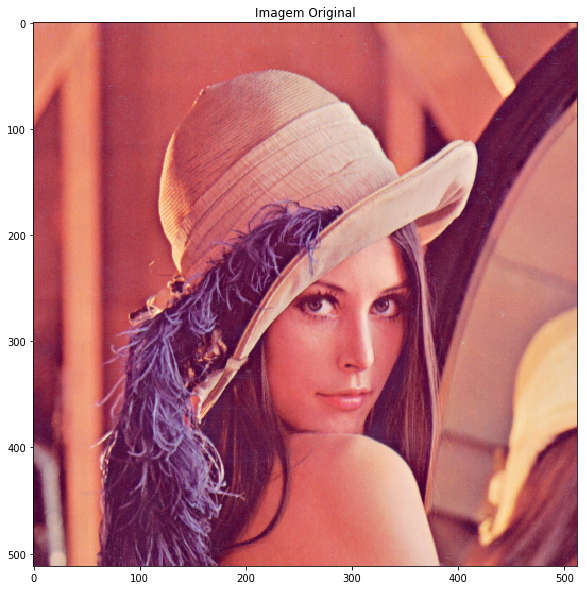

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

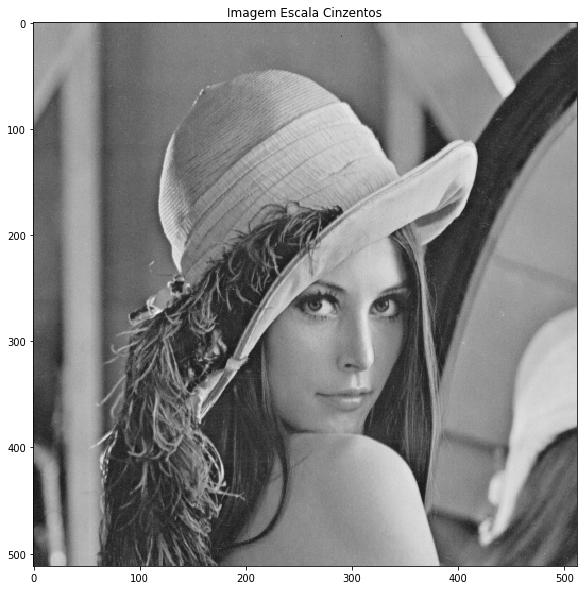

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
def convert(image: np.ndarray, file: str) -> (np.ndarray, int):

    cv2.imwrite(file, cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    convertedsize = os.path.getsize(file)
    convertedimage = cv2.imread(file)
    return convertedimage, convertedsize

compressed_image_path = '../resources/processed/lenac100.jpg'
gray_image_path = '../resources/processed/lenacGRAY.jpg'

compressed_image = read_image(compressed_image_path, 'Imagem Original')
gray_image, gray_image_size = convert(compressed_image, gray_image_path)
gray_image = read_image(gray_image_path, 'Imagem Escala Cinzentos')

<hr/>
$\normalsize{\mathit{4.\ Apresente\ o\ histograma\ da\ imagem\ em\ tons\ de\ cinzento,\ verifique\ quantos\ níveis\ de\ cinzento\ tem\ a\ imagem.}}$

<hr/>
$\mathrm{A\ imagem\ tem\ 256\ níveis\ de\ cinzento,\ dado\ que\ cada\ pixel\ da\ imagem\ é\ do\ tipo\ \mathit{uint8}.}$ 
<br/>

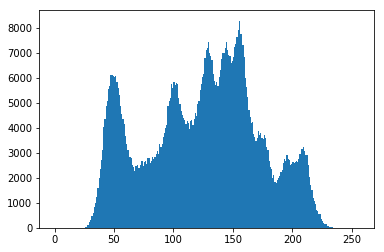

In [21]:
def histogram(image: np.ndarray) -> None:
    plt.hist(image.ravel(), 256, [0,256])
    plt.show()

histogram(gray_image)

<hr/>
$\normalsize{\mathit{5.\ Nos\ próximos\ trabalhos\ será\ necessário\ realizar\ operações\ com\ os\ valores\ de\ cada\ pixel.\ Para\ este\ efeito\ pode-se\\ transformar\ a\ imagem\ para\ um\ array.\ O\ código\ seguinte\ representa\ o\ pixel\ mais\ significante\ da\ imagem.\ Apresente\ oito\\ imagens,\ cada\ uma\ com\ o\ valor\ de\ cada\ bit\ para\ todos\ os\ pixeis.}}$

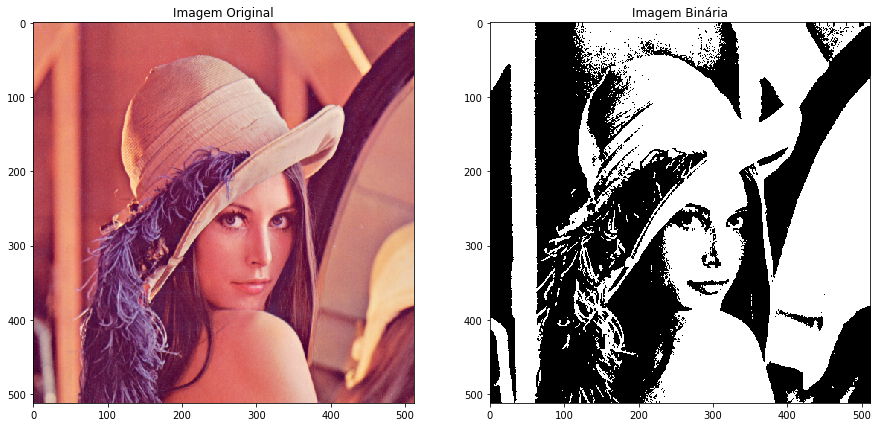

In [22]:
def binaryarray(original_image: np.ndarray) -> np.ndarray:

    fig=plt.figure(figsize=(15, 15))
    fig.add_subplot(1, 2, 1)
    plt.title('Imagem Original')
    plt.imshow(original_image[:,:, [2, 1, 0]], cmap=plt.cm.gray)
    fig.add_subplot(1, 2, 2)
    plt.title('Imagem Binária')
    binary_image = ((original_image[:, :, 1] > 90) * 1.0) * 255
    plt.imshow(binary_image, cmap=plt.cm.gray)
    plt.show()
    
    return binary_image

binary_image = binaryarray(compressed_image)

In [23]:
def bitfilter(image: np.ndarray, bit: int) -> None:
        
    mostsignificantbit = int(str(image.dtype)[-1:])
    bitmask = 0b10000000
    
    fig=plt.figure(figsize=(15, 15))
    
    fig.add_subplot(1, 2, 1)
    bitshiftedimage = np.right_shift(image, mostsignificantbit - bit)
    plt.title('Imagem com ' + str(bit) + ' bits :: Bitshift')
    plt.imshow(bitshiftedimage[:,:,[2,1,0]])
    
    fig.add_subplot(1, 2, 2)
    bitmask = bitmask >> (mostsignificantbit - bit)
    maskedbitimage = np.bitwise_and(image, bitmask)
    plt.title('Janela ' + str(bit) + 'º bit :: Bitmask')
    plt.imshow(maskedbitimage[:,:,[2,1,0]])

    plt.show()

In [24]:
def select_bit(x: int) -> None:
    bitfilter(sample_image, x)

interact(select_bit, x=widgets.IntSlider(value=8, min=1,\
        max=8, step=1, description='Bit:', disabled=False,\
        continuous_update=True, orientation='horizontal', readout=True, readout_format='d'))

interactive(children=(IntSlider(value=8, description='Bit:', max=8, min=1), Output()), _dom_classes=('widget-i…

<function __main__.select_bit(x: int) -> None>

<hr/>
$\normalsize{\mathit{6.\ Grave\ uma\ imagem\ que\ contém\ apenas\ a\ informação\ dos\ 4\ bits\ mais\ significantes\ da\ imagem.}}$

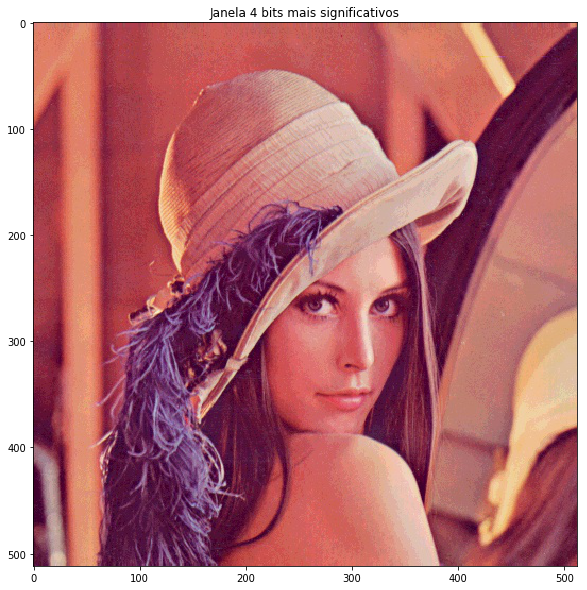

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
def bitmasking(image: np.ndarray) -> None:

    MS4_bitmask = 0b11110000
    MSB_image = np.bitwise_and(image, MS4_bitmask)
    file = '../resources/processed/lenac4bit.jpg'
    cv2.imwrite(file, MSB_image)
    read_image(file, 'Janela 4 bits mais significativos')

bitmasking(sample_image)

<hr/>
$\normalsize{\mathit{7.\ Construa\ uma\ função\ que\ realize\ o\ algoritmo\ de\ dithering\ Floyd\ Steinberg.\ Esta\ função\ recebe\ uma\ matrix\ (com\ os\ pixeis\\ em\ tons\ de\ cinzento)\ e\ devolve\ uma\ matrix\ com\ valores\ a\ preto\ e\ branco.\ Este\ algoritmo\ aproxima\ cada\ pixel\ da\ imagem\\ ao\ valor\ mais\ próximo\ (preto\ ou\ branco)\ e\ o\ erro\ é\ difundido\ para\ os\ pixeis\ adjacentes\ seguindo\ o\ método.}}$

<hr/>
$\mathrm{Dithering\ ou\ matização,\ é\ uma\ técnica\ óptica\ usada\ na\ computação\ gráfica\ em\ que\ se\ intercalam\ píxeis\ de\ duas\ cores\ diferentes\ entre\ duas\ áreas\ adjacentes,\ a\ fim\ de\ se\ criar\ uma\ tonalidade\ variante\ dos\ tons\ dessas\ áreas\ adjacentes,\ assim\ fazendo\ um\ degradé\ entre\ elas.\\ O\ método\ possibilita\ a\ obtenção\ de\ tons\ de\ cores\ que,\ de\ outra\ forma,\ não\ se\ obteriam,\ ou\ a\ impressão\ de\ escala\ de\ cinzentos\ apenas\ com\\ valores\ de\ branco\ e\ preto.}$ 

$\mathrm{O\ tamanho\ mínimo\ da\ imagem\ será\ 512x512x3\ (786.432\ kbytes),\ no\ caso\ de\ 3\ canais\ (imagem\ RGB)\ ou\ 512x512\ (262.144\ kbytes),\\ no\ caso\ de\ 1\ canal\ (imagem\ binária)\ -\ supondo\ que\ cada\ pixel\ será\ representado\ por\ um\ inteiro\ a\ 8\ bits\ (0-255).}$ 

In [162]:
%%time

def dither(image: np.ndarray, file_target: str, qfactor: int, colored: bool) -> (np.ndarray):
    
    image = image[:,:,1] if (not colored) else image
    # Detects and sets number of colors in image 
    # RGB image, colored or grayscale, is a 3D array in each pixel, thus 3 colors
    # Binary image, black and white, is a 1D array in each pixel, thus 1 color
    
    output_image = image.astype(np.float64)
    iwidth = output_image.shape[0]
    iheight = output_image.shape[1]

    for x in range(1, iwidth-1):
        for y in range(1, iheight-1):
            
            pixel = output_image[x][y] 
            # Retrieves a 3D (colored image) [128, 128, 128] array or 1D (binary image) [128] array from each pixel
            
            qpixel = np.round(qfactor*pixel/255)*(255/qfactor)
            # Quantizes such array to 3D [0, 85, 170, 255] or 1D [0, 255], according to the previous colors detected 
            
            error = (pixel - qpixel)
            # Saves up the data lost in previous quantization
            
            output_image[x    ][y    ] = qpixel
            # Places back a quantized array, either 1D or 3D, in the former pixel
            
            output_image[x + 1][y    ] += 7/16. * error
            output_image[x - 1][y + 1] += 3/16. * error
            output_image[x    ][y + 1] += 5/16. * error
            output_image[x - 1][y + 1] += 1/16. * error
            # Diffuses the error to the surrounding pixels
    
    output_image = output_image.astype(np.uint8)
    # Converts back from np.float64 to np.uint8 to minimize size
   
    np.set_printoptions(precision=2)
    clt.text("Dimensões: " + str(output_image.shape))
    clt.text("Pixel: " + str(output_image[1][1]))
    clt.text("Tipo:" + str(type(output_image)) + str(output_image.dtype))
    clt.text("Tamanho:" + str(output_image.nbytes/1000.) + " kbytes")
    clt.text(str('\n'))
    # Debugs output image data
        
    cv2.imwrite(file_target, output_image)
    # Writes image to file
    
    return output_image

quality_factor = 1
file_target_RGB = '../resources/processed/lenaRGBdither.jpg'
file_target_GRAY = '../resources/processed/lenaGRAYdither.jpg'
dithered_image_RGB = dither(sample_image, file_target_RGB, quality_factor, True)
dithered_image_GRAY = dither(gray_image, file_target_GRAY, quality_factor, False)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Wall time: 5.51 s


In [163]:
def select_dither(file: str) -> None:
    global dithered_image
    dithered_image = read_image(file, 'Floyd-Steinberg Dithering ::')

interact(select_dither, file={  'lenaRGBdither.jpg':file_target_RGB, 
                                'lenaGRAYdither.jpg':file_target_GRAY })

interactive(children=(Dropdown(description='file', options={'lenaRGBdither.jpg': '../resources/processed/lenaR…

<function __main__.select_dither(file: str) -> None>

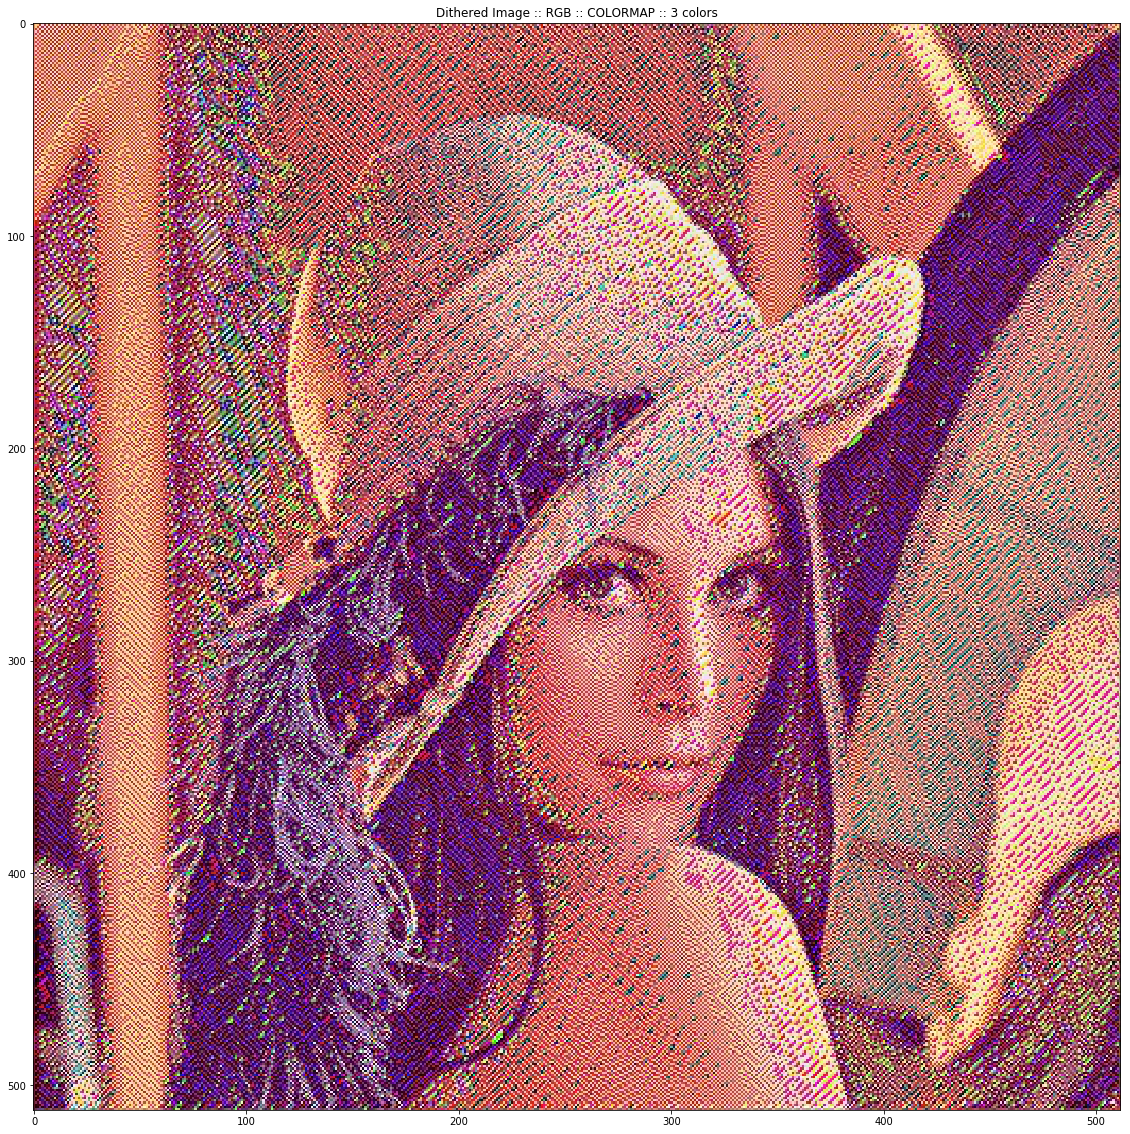

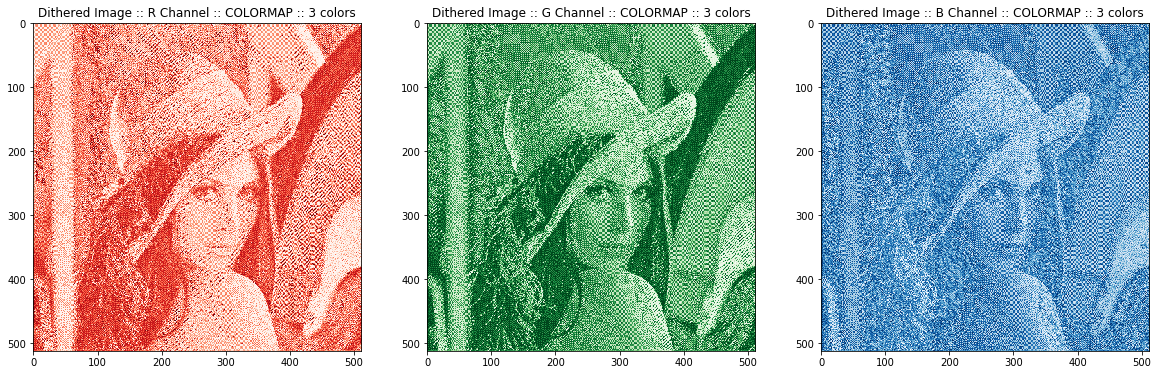

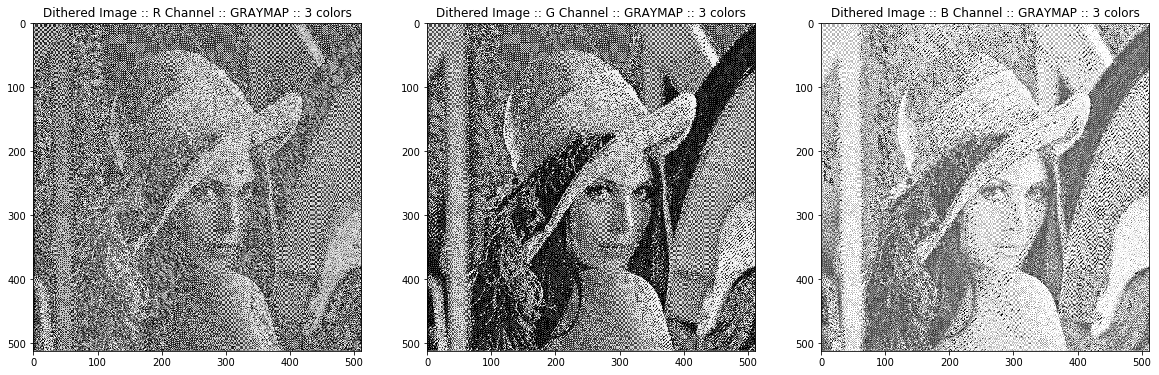

In [165]:
def detail(image: np.ndarray, title: str) -> None:
    fig1 = plt.figure(figsize=(20,20))
    plt.title("Dithered Image :: RGB :: COLORMAP :: " + str(image.shape[2]) + " colors")
    plt.imshow(image[:,:,[2,1,0]])
    plt.show(fig1)
    
    fig2 = plt.figure(figsize=(20,20))
    plt.subplot(231)
    plt.title(title + " :: R Channel :: COLORMAP :: " + str(image.shape[2]) + " colors")
    plt.imshow(image[:,:,2], cmap='Reds_r')
    plt.subplot(232)
    plt.title(title + " :: G Channel :: COLORMAP :: " + str(image.shape[2]) + " colors")
    plt.imshow(image[:,:,1],  cmap='Greens_r')
    plt.subplot(233)
    plt.title(title + " :: B Channel :: COLORMAP :: " + str(image.shape[2]) + " colors")
    plt.imshow(image[:,:,0], cmap='Blues_r')
    plt.show(fig2)
    
    fig3 = plt.figure(figsize=(20,20))
    plt.subplot(231)
    plt.title(title + " :: R Channel :: GRAYMAP :: " + str(image.shape[2]) + " colors")
    plt.imshow(image[:,:,0], cmap='Greys_r')
    plt.subplot(232)
    plt.title(title + " :: G Channel :: GRAYMAP :: " + str(image.shape[2]) + " colors")
    plt.imshow(image[:,:,1], cmap='Greys_r')
    plt.subplot(233)
    plt.title(title + " :: B Channel :: GRAYMAP :: " + str(image.shape[2]) + " colors")
    plt.imshow(image[:,:,2], cmap='Greys_r')
    plt.show(fig3)
    
detail(dithered_image, 'Dithered Image')

<hr/>
$\normalsize{\mathit{8.\ Construa\ uma\ função\ para\ gravar\ a\ matriz\ para\ um\ ficheiro\ binário.\ Verifique\ o\ tamanho\ do\ ficheiro\ inicial\ e\ do\ ficheiro\\ final.\ Calcule\ a\ taxa\ de\ compressão\ e\ meça\ o\ SNR\ e\ o\ PSNR.}}$


In [166]:
def write(original_array: np.ndarray) -> None:
    
    assert str(type(original_array)).split('\'')[1] == 'numpy.ndarray', "Matriz não é <class 'numpy.ndarray' >." 

    target_file1 = '../resources/processed/lenaditherJPG.jpg'
    target_file2 = '../resources/processed/lenaditherPNG.png'
    target_file3 = '../resources/processed/lenaditherBINARY.txt'
    
    # Detect size of matrix with np.ndarray.nbytes (np.uint8)
    filesize_numpy = original_array.nbytes
    clt.text('Tamanho detetado da matriz Numpy em binário: ' + str(filesize_numpy/1000) + ' Kbytes')
        
    # Writting example with OpenCV for JPG
    cv2.imwrite(target_file1, original_array, (cv2.IMWRITE_JPEG_QUALITY, 100))
    filesize_jpg = os.path.getsize(target_file1) 
    clt.text('Tamanho final escrita OpenCV/JPG: ' + str(filesize_jpg/1000) + ' Kbytes')
    
    # Writting example with OpenCV for PNG
    cv2.imwrite(target_file2, original_array, (cv2.IMWRITE_PNG_COMPRESSION, 9))
    filesize_opencv = os.path.getsize(target_file2) 
    clt.text('Tamanho final escrita OpenCV/PNG: ' + str(filesize_opencv/1000) + ' Kbytes')

    # Writting example with File.write(array.tobytes())
    byte_array = original_array.tobytes()
    retrieved_array = np.frombuffer(byte_array, dtype=np.uint8).reshape(original_array.shape)
    assert np.array_equal(original_array, retrieved_array), "Matriz binária não equivale à matriz original."
    file = open(target_file3, 'wb')
    file.write(byte_array)
    file.close()
    filesize_binary = os.path.getsize(target_file3)
    clt.text('Tamanho final escrita binária: ' + str(filesize_binary/1000) + ' Kbytes')

    
write(dithered_image)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<hr/>
$\mathrm{Existem\ várias\ formas\ para\ gravar\ matrizes\ \mathit{numpy.ndarray}\ para\ disco. Testou-se\ a\ escrita\ através\ de\ OpenCV\ para\ formato\ JPEG\ (a\ qualidade\\ de\ compressão\ 100),\ após\ Dithering\, com\ os\ melhores\ resultados\, mesmo\ comparando\ com\ a\ anterior\ conversão\ JPEG\ em\ qualidade\ de\\ compressão\ 100\ (192.365\ Kbytes)\ e,\ finalmente,\ a\ escrita\ através\ dos\ métodos\ .tobytes()\ e\ .write()\ em\ modo\ binário\ ('wb')\ com\ resultados\\ apenas\ razoáveis\ (786.432 Kbytes).\ Invoca-se,\ como\ referência,\ o\ teste\ comparativo\ de\ Mark\ Verleg\ para\ posterior\ análise:}$ 


![Array Storage Performance Benchmark](../resources/processed/random_array_storage_performance_benchmark.png)

[Array Storage Performance Benchmark Github Repo](https://github.com/mverleg/array_storage_benchmark)

<hr/>
$\normalsize{\mathit{9.\ Crie\ uma\ função\ que\ apresente\ uma\ imagem\ (100×100)\ como\ se\ apresenta\ na\ figura.\ O\ ângulo\ de\ cada\ sector\ é\ dado\ por\ parâmetro\ passado\ à\ função\ (o\ ângulo\ é\ um\ valor\ inteiro\ entre\ 0\ e\ 360\ graus).}}$

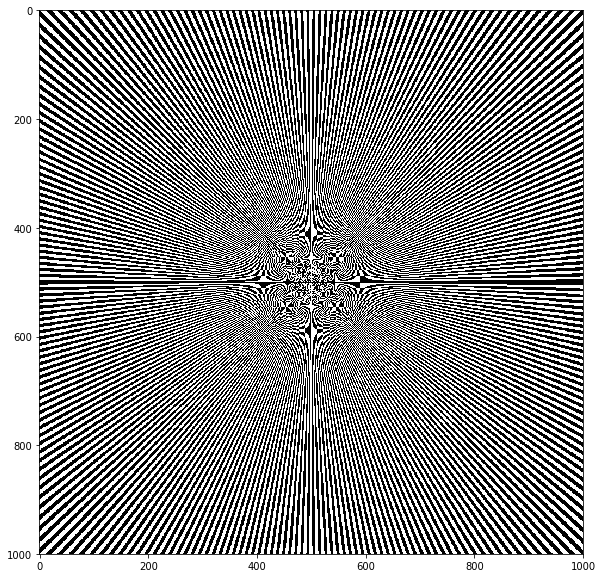

In [167]:
def illusion(angle: int) -> None:
    x = np.arange(-500, 500, 1)
    y = np.arange(-500, 500, 1)*1j
    x, y = np.meshgrid(x, y)
    z = x + y
    lines = np.floor((np.angle(z)*angle).astype(np.int32))%2*255
    plt.figure(figsize=(10,10))
    plt.imshow(lines, cmap='gray')
    plt.show()
    
illusion(90)